<a href="https://colab.research.google.com/github/awwesomeman/data-analysis/blob/main/AI_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 匯入基本套件

In [ ]:
!pip install arch

     |████████████████████████████████| 808kB 17.9MB/s 


In [ ]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 18.8MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=849354edd2480a0e8125a28723418dc399d346ce36d3e05d892869ae30d3671d
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## B.1Simulation of return and prices.

#### (a)Try to generate and plot a sample size of 500 normal random sequence of N(5, $3^2$).

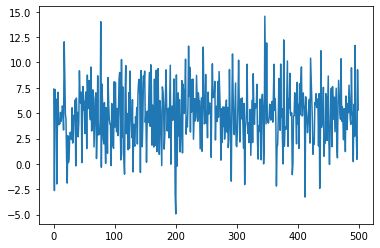

In [ ]:
data = np.random.normal(5, 3, 500)
plt.plot(data)

(array([ 1.,  2.,  1.,  2.,  2.,  7.,  3.,  4.,  5.,  7.,  6.,  7., 12.,
        11., 14., 20., 12., 18., 13., 23., 20., 17., 14., 23., 20., 24.,
        17., 13., 25.,  8., 25., 14., 18., 12., 11., 12., 11., 10.,  4.,
         7.,  2.,  5.,  3.,  4.,  3.,  2.,  3.,  1.,  0.,  2.]),
 array([-78.14836177, -74.78358694, -71.41881211, -68.05403727,
        -64.68926244, -61.32448761, -57.95971277, -54.59493794,
        -51.23016311, -47.86538827, -44.50061344, -41.1358386 ,
        -37.77106377, -34.40628894, -31.0415141 , -27.67673927,
        -24.31196444, -20.9471896 , -17.58241477, -14.21763994,
        -10.8528651 ,  -7.48809027,  -4.12331543,  -0.7585406 ,
          2.60623423,   5.97100907,   9.3357839 ,  12.70055873,
         16.06533357,  19.4301084 ,  22.79488323,  26.15965807,
         29.5244329 ,  32.88920773,  36.25398257,  39.6187574 ,
         42.98353224,  46.34830707,  49.7130819 ,  53.07785674,
         56.44263157,  59.8074064 ,  63.17218124,  66.53695607,
         69.

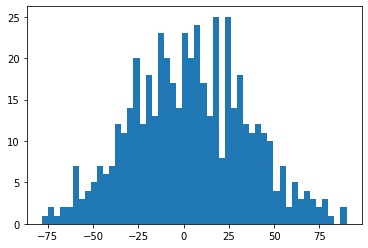

In [ ]:
plt.hist(data,bins = 50)

#### (b)Try to simulate a sample size of 500 return series with standard normal N(0, 1) shocks and AR(1) process
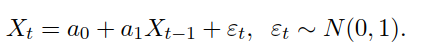

In [ ]:
# linear 模型初始值相對於nonlinear較不重要

假設真實母體參數 a0 = 0, a1 = 0.5

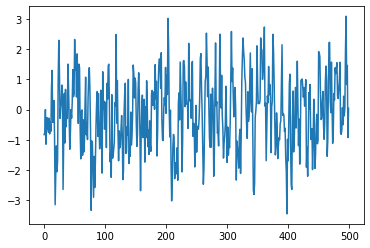

In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess 
ar = np.array([1, -0.5]) 
ma = np.array([1]) 
AR_object = ArmaProcess(ar, ma) 
simulated_data = AR_object.generate_sample(nsample=500) 
plt.plot(simulated_data)

#### (c)Verify that the Xt series is indeed an AR(1) process!

用 AR(1) 模型去配適，可以發現 a0 與 a1 非常接近真實母體參數

In [ ]:
from statsmodels.tsa.arima_model import ARMA 
mod = ARMA(simulated_data, order=(1,0)) 
result = mod.fit()
print("平均數(a0)估計值: ", result.params[0], "\n係數(a1)估計值: ", result.params[1])

平均數(a0)估計值:  -0.11613248993158587 
係數(a1)估計值:  0.5215634685026797


另外從 PACF 圖中 lag 1期之數值顯著異於 0 可以判斷此過程為AR(1)

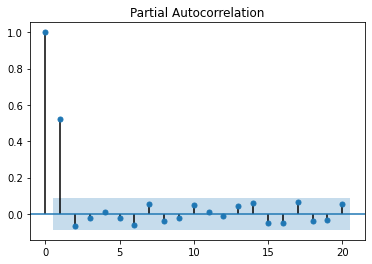

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(simulated_data, alpha=0.05, lags=20)
plt.show()

#### (d)Back out and plot the price sequence of the generated AR(1) return series assuming the initial price as 10.

我們定義由AR(1)模型所模擬的股價報酬為 $P_t$ - $P_{t-1}$，不是報酬率
依題目假設初始股價為 10，並設定 AR(1) 之報酬續列的第一筆資料為 0

Text(0.5, 1.0, 'trend of the stock price')

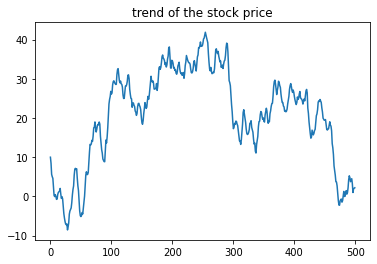

In [ ]:
initial_price = 10
simulated_data[0] = 0
stockprice = initial_price + simulated_data.cumsum()
plt.plot(stockprice)
plt.title('trend of the stock price')

#### (e)How would you do it if you are asked to generate a sequence of price series with GARCH effect in its error?

我們設定rt為一個AR(1)過程 

$r_t$=0+0.5$r_{t-1}$+$\epsilon_t$

$\epsilon_t$=$\sigma_t$$\nu_t$, $\nu_t$ ~iid N(0,1)

$\sigma_t^2$ = 0.01+0.015$\epsilon_{t-1}^2$+0.95$\sigma_{t-1}^2$

----------------------------------------

$r_1$=0+0.5$r_0$+$\epsilon_1$

$\epsilon_1$=$\sigma_1$$\nu_1$, $\nu_1$ ~iid N(0,1)

$\sigma_1^2$ = 0.01+0.015$\epsilon_0^2$+0.95$\sigma_0^2$

In [2]:
whitenoise = np.random.normal(0, 1, 800)

In [3]:
r = 0
epsilon = 0
sigma = 0
ret =[0]
for t in range(800):
  sigma = (0.01 + 0.015 * epsilon**2 + 0.95 * sigma**2)**0.5
  epsilon = sigma*whitenoise[t]
  r = 0.5*r + epsilon
  ret.append(r)

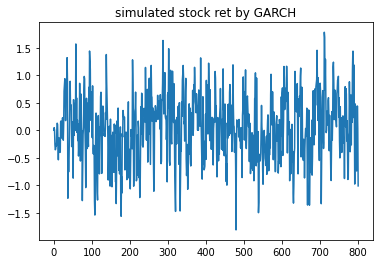

Text(0.5, 1.0, 'trend of the stock price')

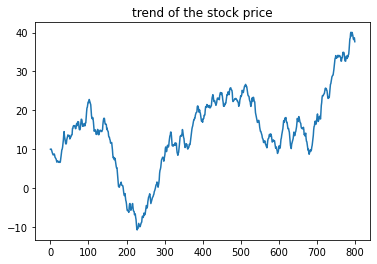

In [6]:
plt.plot(ret)
plt.title('simulated stock ret by GARCH')
plt.show()

initial_price = 10
ret[0] = 0
stockprice = initial_price + pd.Series(ret).cumsum()
plt.plot(stockprice)
plt.title('trend of the stock price')

In [ ]:
initial_price = 10
simulated_data[0] = 0
stockprice = initial_price + simulated_data.cumsum()
plt.plot(stockprice)
plt.title('trend of the stock price')

## B.2 Find the daily prices of ONE of the FAAG equities among Facebook, Amazon, Apple, and Google, for the period of Jan 01, 2010 till December 31, 2020.

#### (a)Summarize the return series and fit an ARMA model for the return, what do you find?

我們選擇蘋果公司的股價來進行模擬

In [ ]:
import yfinance as yf
import pandas as pd

def get_historical_data(ticker):
  d = yf.Ticker(ticker)
  df = d.history(period="max")
  df.columns = df.columns.str.lower()
  df.columns = pd.Series(df.columns).str.capitalize().values
  return df.dropna()

df = get_historical_data('AAPL')
df = df["2010-01-01":"2020-12-31"]
price = df['Close']
ret = price.pct_change().dropna()

Text(0.5, 1.0, 'AAPL stock price')

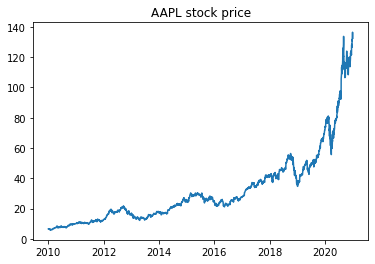

In [ ]:
plt.plot(price)
plt.title('AAPL stock price')

Text(0.5, 1.0, 'AAPL stock return')

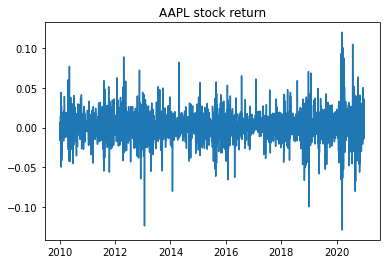

In [ ]:
plt.plot(ret)
plt.title('AAPL stock return')

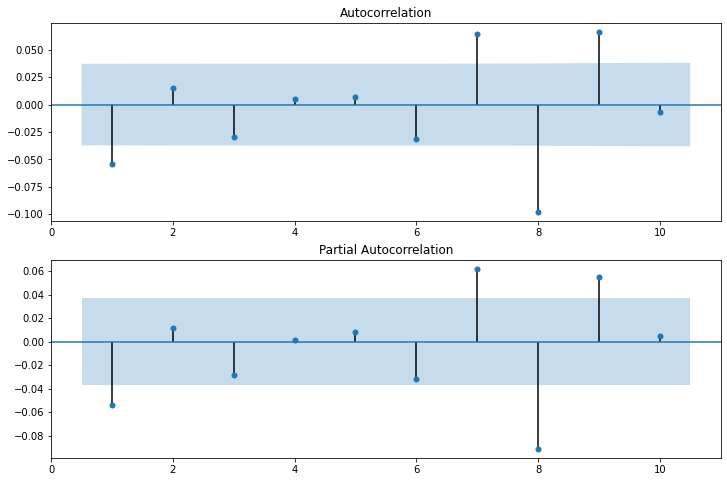

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
plot_acf(ret, alpha=0.05, zero=False, lags=10,ax=ax1)
plot_pacf(ret, alpha=0.05, zero=False, lags=10,ax=ax2)
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARMA  
bic_list=[]
record=[]
count=0
for i in range(1,4):
  for j in range(1,4):

    try:
      
      model = ARMA(ret, order=(i,j)) 
      bic_list.append(model.fit().bic)
      record.append([count,(i,j)]) 
      count+=1

    except:
      pass

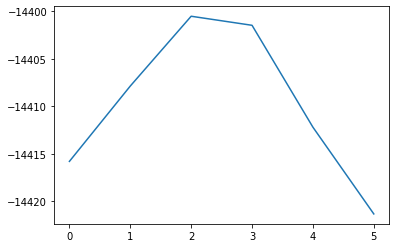

In [ ]:
plt.plot(bic_list)

In [ ]:
record[5]

[5, (3, 3)]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


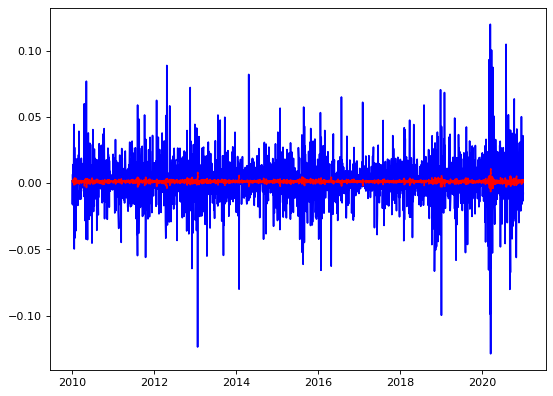

In [ ]:
from matplotlib.pyplot import figure
model = ARMA(ret, order=(1,1))
result = model.fit()
result.predict() 


figure(figsize=(8, 6), dpi=80)
plt.plot(ret,color='blue')
plt.plot(result.predict(),color='red',linestyle='--')

plt.show()

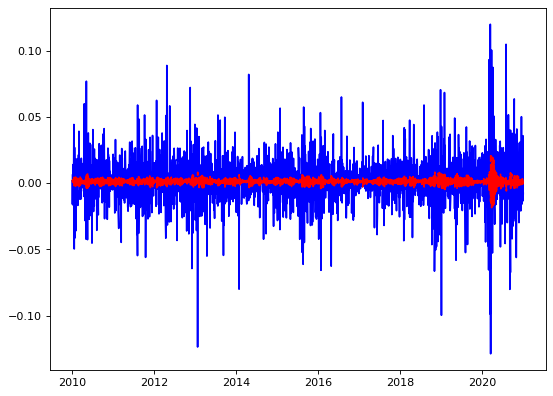

In [ ]:
from matplotlib.pyplot import figure
model = ARMA(ret, order=(3,3))
result = model.fit()
result.predict() 


figure(figsize=(8, 6), dpi=80)
plt.plot(ret,color='blue')
plt.plot(result.predict(),color='red',linestyle='--')

plt.show()

#### (b)Fit a pure GARCH(1,1) model for its return.Report what you find and justify your model fitness or model appropriateness.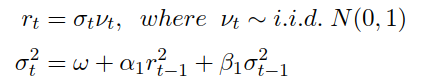

In [ ]:
from arch import arch_model
gm_model = arch_model(ret, p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'normal')
gm_result = gm_model.fit(disp = 'off') 
print(gm_result.summary()) 

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                7441.14
Distribution:                  Normal   AIC:                          -14874.3
Method:            Maximum Likelihood   BIC:                          -14850.6
                                        No. Observations:                 2768
Date:                Sun, Apr 25 2021   Df Residuals:                     2767
Time:                        19:56:05   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.7938e-03  2.969e-04      6.041  1.534e-09 [1.

/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:317: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003178. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


In [ ]:
gm_model = arch_model(ret, p = 1, q = 2, mean = 'constant', vol = 'GARCH', dist = 'normal')
gm_result = gm_model.fit(disp = 'off') 
print(gm_result.summary()) 

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                7452.17
Distribution:                  Normal   AIC:                          -14894.3
Method:            Maximum Likelihood   BIC:                          -14864.7
                                        No. Observations:                 2768
Date:                Sun, Apr 25 2021   Df Residuals:                     2767
Time:                        20:03:41   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.9511e-03  3.241e-04      6.020  1.743e-09 [1.

/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:317: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003178. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


#### (c) Use the fitted GARCH volatility σt to find the 95% VaR (value-at-risk) of the return series assuming Normal. Contrast it with another scenario of 95% VaR assuming the return as pure normal without GARCH effect.

In [ ]:
gm_model = arch_model(ret, p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'normal')
gm_result = gm_model.fit(disp = 'off') 
gm_forecast = gm_result.forecast(start='2010')
mean_forecast = gm_forecast.mean[:]
variance_forecast = gm_forecast.variance[:]
q_parametric = gm_model.distribution.ppf(0.05)
mean_forecast.values + np.sqrt(variance_forecast).values * q_parametric

# Calculate the VaR
VaR_parametric = mean_forecast.values + np.sqrt(variance_forecast).values * q_parametric
# Save VaR in a DataFrame
VaR_parametric = pd.DataFrame(VaR_parametric, columns = ['5%'], index = variance_forecast.index)

# Plot the VaR
figure(figsize=(10, 6), dpi=80)
plt.plot(VaR_parametric, color = 'red', label = '5% Parametric VaR')
plt.scatter(variance_forecast.index,ret, color = 'orange', label = 'AAPL Returns' )
plt.legend(loc = 'upper right')
plt.show()

NameError: ignored

In [ ]:
figure(figsize=(10, 6), dpi=80)
plt.scatter(ret.index,ret, color = 'orange', label = 'AAPL Returns' )
plt.axhline(np.percentile(ret,5), color='r')
print('VaR = ', np.percentile(ret,5))

NameError: ignored

#### (d)Suppose every equity is subject to the market model (meaning with a common market factor), so you also download the S&P 500 price index for market return. Now you fit a market model with GARCH(1,1). Compare the fitted model with that of (b). Any difference between σt and σ˜t? Explain what you find!


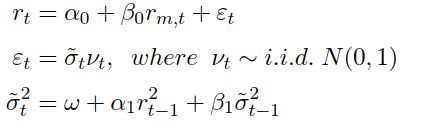

In [ ]:
sp500 = get_historical_data('^GSPC')
sp500 = sp500["2010-01-01":"2020-12-31"]
price = sp500['Close']
sp500_ret = price.pct_change().dropna()

## B.3 Using the return pair data that you have in the previous question B.2.(d), and trimmed the sample to the last 25. (yes, 25 sample points.)

#### (a) Fit the market model for the 25 sample points and explain the fitted results.
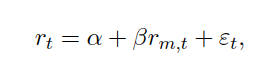

由模型結果可以知道，截距估計值約為0.0036，不顯著。斜率估計值約為1.6928，顯著。

蘋果公司的股票beta約為1.69，且此係數在統計上顯著。

可是在整題模型的配適度上，R-squared只有0.273，可能原因為資料量不足

In [ ]:
target_data = pd.concat([sp500_ret,ret],join='inner',axis=1).iloc[-25:,:]
target_data.columns=['market return', 'apple return']
market_ret = target_data['market return']
apple_ret = target_data['apple return']

In [ ]:
import statsmodels.api as sm
market_ret = sm.add_constant(market_ret) 
model = sm.OLS(apple_ret, market_ret).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           apple return   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     8.639
Date:                Sun, 25 Apr 2021   Prob (F-statistic):            0.00737
Time:                        15:02:01   Log-Likelihood:                 70.828
No. Observations:                  25   AIC:                            -137.7
Df Residuals:                      23   BIC:                            -135.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0036      0.003      1.169

#### (b)Resample with bootstrap for B = 500 times to find out the sampling distribution of αˆ and βˆ under the sample size of 25. Please summarize and plot your findings.

In [ ]:
import random
alpha = []
beta = []
for _ in range(500):
  random.sample([tuple(i) for i in target_data.values],25)
  market_ret = [i[0] for i in random.sample([tuple(i) for i in target_data.values],25)] 
  stock_ret = [i[1] for i in random.sample([tuple(i) for i in target_data.values],25)]
  market_ret = sm.add_constant(market_ret)
  model = sm.OLS(stock_ret, market_ret).fit()
  alpha.append(model.params[0])
  beta.append(model.params[1])

截距項敘述統計量 count    500.000000
mean       0.005806
std        0.000866
min        0.003188
25%        0.005228
50%        0.005818
75%        0.006403
max        0.007986
dtype: float64


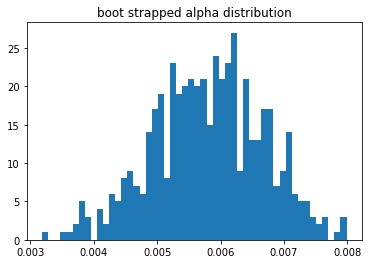

In [ ]:
plt.hist(alpha,bins=50)
plt.title('boot strapped alpha distribution')
print("截距項敘述統計量", pd.Series(alpha).describe())

斜率敘述統計量 count    500.000000
mean       0.008812
std        0.656275
min       -1.642745
25%       -0.443052
50%       -0.000380
75%        0.446991
max        1.991722
dtype: float64


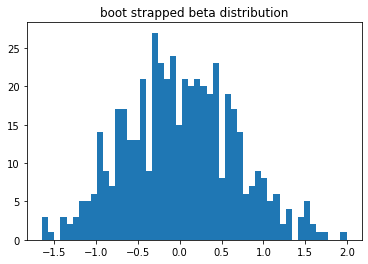

In [ ]:
plt.hist(beta,bins=50)
plt.title('boot strapped beta distribution')
print("斜率敘述統計量", pd.Series(beta).describe())

#### (c)Using the bootstrapped mean and standard deviation of αˆ and βˆ for inference and compare with the fitted results in (a), what do you find?(block boot strap 一次抽五筆抽五個) (bootstrap 標準物可能效果比較好 減ㄧ除上標準物去看

1. 拔靴法之截距的平均值為0.005806，標準差為0.000866，和(a)的0.0036比較差異不大


2. 拔靴法之斜率的平均值為0.008812，標準差為0.656275，和(a)的1.6928比較，可以發現1.6928可能是因為在樣本數太少且只錯一次回歸的原因，造成他在虛擬的母體分配中離平均值很遠。


In [ ]:
12331